#### AOS 575 - subsampling - Lecture, 9/16/2020
Originally coded by Prof. Barnes (CSU), <br>
updated/adapted for Jupyter Notebook/Python3 by Prof. Kay (CU), Last updated: January 10, 2019 <br>
updated for AOS 575 by Prof. Maroon (UWisc)<br>
Last updated: September 11, 2020

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.io as sio
import pandas as pd

In [2]:
### Load data (provides an example of loading data from matlab)
#Note that we're not using xarray here, instead using scipy's input/output (IO) functionality
DATA = sio.loadmat('subsampling_example_Z500_August.mat') 
X = DATA['X'][:,0]        #the zero selects one specific location in the dataset
LAT = DATA['LAT'][0][0]
LONG = DATA['LONG'][0][0]

print('The shape of our data is:',np.shape(X))

The shape of our data is: (1054,)


In [3]:
## Randomly grab 20 days and take the mean 
## Do it 2500 times to build up a distribution of sample means
sample_length = 20
P = np.empty(2500)
for j, val in enumerate(P):
    ir = stats.randint.rvs(0,len(X)-1,size = sample_length)  #randomly selects N integers as indices to then use as the random sample
    P[j] = np.nanmean(X[ir])                                 #takes the means of the dataset at the randomly drawn 20 indices

(5700, 6000)

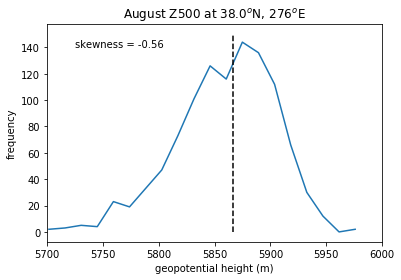

In [4]:
### Plot the distribution of X
h, bins = np.histogram(X,20)
plt.plot(bins[:-1],h)

plt.xlabel('geopotential height (m)')
plt.ylabel('frequency')
plt.plot([np.mean(X), np.mean(X)],[0., 150],'--', color = 'black')
plt.title('August Z500 at ' + str(np.round(LAT)) + '$^o$N, ' + str(round(LONG)) + '$^o$E')
Z = (X-np.mean(X))/np.std(X)
plt.text(5725, 140, 'skewness = ' + str(round(stats.skew(Z[:]), 2))) 
plt.xlim(5700, 6000)

(5800, 5900)

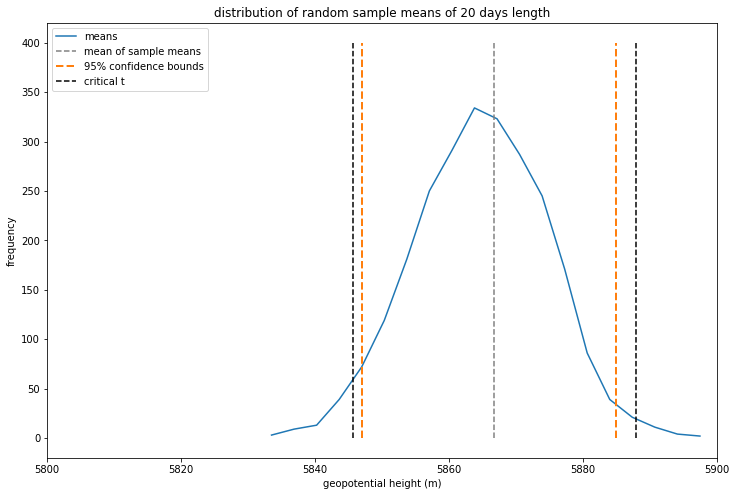

In [5]:
#Plot the distribution of the randomly drawn N-length sample means

f=plt.figure(figsize=(12,8))

mp = 0.
h, bins = np.histogram(P-mp,20)
plt.plot(bins[:-1],h, color = 'C0', label = 'means')
plt.plot((np.mean(X), np.mean(X)),(0., 400),'--', color = 'grey', label = 'mean of sample means');
 
#uses bootstrapping to find the actual 95% bounds in the samples
a1 = np.percentile(P-mp,2.5)      #the 2.5th percentile
a2 = np.percentile(P-mp,100.-2.5) #the 97.25th percentile -- 95% fall betweens!

plt.plot((a1,a1),(0,400),'--',color = 'C1', linewidth = 2, label = '95% confidence bounds')
plt.plot((a2,a2),(0,400),'--',color = 'C1', linewidth = 2)

#Assumes the distribution is normal and uses the t-statistic to estimate the 95% confidence
t_inc = (stats.t.ppf(0.975, sample_length - 1))*np.std(X)/np.sqrt(sample_length-1)


plt.plot(np.ones((2,))*(np.mean(X)-t_inc), (0,400), '--',color = 'black', label = 'critical t')
plt.plot(np.ones((2,))*(np.mean(X)+t_inc), (0,400), '--',color = 'black')

plt.legend(fontsize = 10)
plt.xlabel('geopotential height (m)')
plt.ylabel('frequency')
plt.title('distribution of random sample means of ' + str(sample_length) + ' days length')
plt.xlim(5800, 5900)

In [6]:
### Check if your results are significant at the 95% confidence level
### In other words - is your average geopotential height when you have aerosol
### formation outside of 95% confidence interval?
### You should find that it is, enabling you to reject the null hypothesis.
### Null Hypothesis = your sample mean is not diferent than the population mean.
print('min 95% confidence interval - geopotential height (m):',round(np.mean(X)-t_inc,0))
print('max 95% confidence interval - geopotential height (m):',round(np.mean(X)+t_inc,0))
print('value we are testing - geopotential height (m)',5900)

min 95% confidence interval - geopotential height (m): 5846.0
max 95% confidence interval - geopotential height (m): 5888.0
value we are testing - geopotential height (m) 5900
